# Gamma index

A 2D gamma analysis can be performed in order compare two dose distributions, typically a measured dose distribution (comparison or evaluated) and a reference dose distribution (e.g., calculated or planned).


> Note:
> Gamma analysis is not available on the graphical user interface.


Dose distributions comparison can be performed using the 2-dimensional gamma index test according to Low's definition {cite}`Daniel_Low_gamma_1998`, as well as some AAPM TG-218 {cite}`Miften_TG218_2018` recommendations:

* The acceptance criteria for dose difference can be selected in absolute mode (in Gy) or relative mode (in %).
  * In relative mode, the percentage could be interpreted with respect to the maximum dose of the evaluated dose distribution, or with respect to the local dose; according to user selection.
* Dose threshold can be adjusted by the user.
* The reference distribution can be selected by the user.
* It is possible to define a search radius as an optimization process for calculation.
* Normalization is not performed. Instead, Dosepy works with absolute dose values.
* Interpolation is not supported yet.


For a complete description of the gamma method, see `Dosepy.image.ArrayImage.gamma2D` in the API section.

## Example with Numpy arrays

In [3]:
from Dosepy.image import load
import numpy as np

We generate two arrays, A and B, with the values ​​96 and 100.

In [2]:
a = np.zeros((30, 30)) + 96
b = np.zeros((30, 30)) + 100

To generate the dose distributions, it is only necessary to indicate the spatial resolution in dots per inch (dpi). Assuming a resolution of 25.4 dpi (1 mm), and using arrays **a** and **b** as the reference distribution and distribution to be evaluated, we execute the following commands:

In [3]:
D_ref = load(a, dpi = 25.4)   # Reference dose distribution
D_eval = load(b, dpi = 25.4)  # Evaluated dose distribution

Gamma comparison between two dose distributions is performed using the gamma2D method. As arguments we need:
* The reference dose distribution
* Dose-to-agreement \[%] or \[Gy].
* Distance-to-agreement \[mm]

On the variable *D_eval*, we apply the *gamma2D* method passing as arguments the reference distribution, D_ref, and tolerance limits (3%, 1 mm). We assign the result to the variables gamma_distribution and pass_rate:

In [ ]:
gamma_distribution, pass_rate = D_eval.gamma2D(D_ref, 3, 1) 

print(f"Pass rate: {pass_rate:.1f} %")  # The result is 0.0% because the array differ by 4%

Pass rate: 0.0 %


By default the dose-to-agrement (3% in the example above) is relative to the maximum of the dose distribution to be **evaluated**. It also can be described as a local dose percentage **(local normalization)** calling the gamma2D method with an extra argument, **local_norm**.


In [7]:
gamma_distribution, pass_rate = D_eval.gamma2D( D_ref, 5, 1, local_norm=True) 

print(f"Pass rate: {pass_rate:.1f} %")  # Pass with 100%

Pass rate: 100.0 %


## Dose distributions from csv files

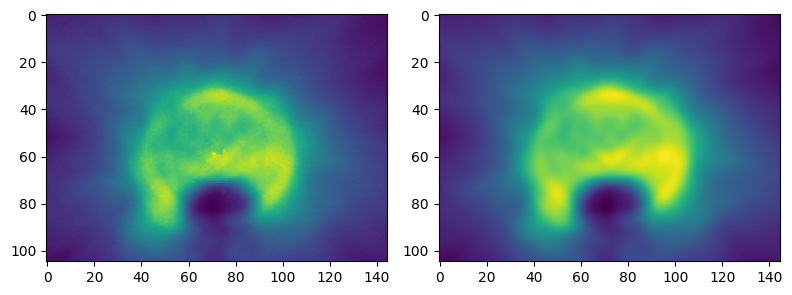

In [5]:
import numpy as np

film_path = "/home/luis/Documents/D_FILM.csv"
tps_path = "/home/luis/Documents/D_TPS.csv"

np_film = np.genfromtxt(film_path, delimiter=",", comments="#")
np_tps = np.genfromtxt(tps_path, delimiter=",", comments="#")

d_film = load(np_film, dpi=25.4)
d_tps = load(np_tps, dpi=25.4)

#-----------------------------------------------------
# Code to plot the dose distributions

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(d_film.array)
ax[1].imshow(d_tps.array)
fig.tight_layout()
plt.show()
#-----------------------------------------------------

On the *d_tps* distribution, we call the gamma2D method, with tolerance 3%, 2 mm, discarding all points with a dose below 10% (**dose_tresh** = 10). *d_film* will be used as the reference distribution and *d_tps* as the distribution to be evaluated. Limiting the distance between two points to a radius of 10 mm to reduce time computation.

In [6]:
g, pass_rate = d_tps.gamma2D(d_film, 3, 2, dose_threshold = 10, mask_radius = 10)

print(f'Pass rate: {pass_rate:.1f} %')

Pass rate: 98.9 %


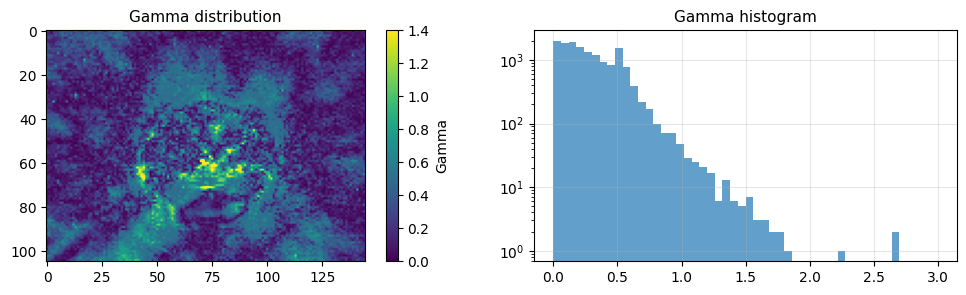

In [7]:
#---------------------------------------------
#   Plotting gamma distribution

fig, axes = plt.subplots(1, 2, figsize=(12, 3))
ax = axes.ravel()

ax[0].set_title('Gamma distribution', fontsize=11)
g_im = ax[0].imshow(g, vmax=1.4)

ax[1].set_title('Gamma histogram', fontsize=11)
ax[1].grid(alpha=0.3)
ax[1].hist(g[~np.isnan(g)], bins=50, range=(0, 3), alpha=0.7, log=True)

fig.colorbar(g_im, ax=ax[0], label='Gamma')

plt.show()


In order to generate easy-to-use software for users who use radiochromic film, dose distributions must meet the following characteristics:
* Film dose distributions must have the same physical dimensions and spatial resolution (equal number of rows and columns) with respect to the dose distribution to be compared. You can use **my_image.reduce_resolution_as(reference_image)** function to manage array size reduction.
* The distributions must be registered, that is, the coordinate of a point in the reference distribution must be equal to the coordinate of the same point in the distribution to be evaluated.
* Gray (Gy) and millimeters (mm) are the units used for absorbed dose and physical distance, respectively.
* The dicom file must contain only a 2D dose distribution.



## Dose distribution with different spatial resolution

Create two images with different resolutions:

In [8]:
from Dosepy.image import load
import numpy as np

# Generate the arrays, A and B.
A = np.random.rand(100, 100)
B = np.random.rand(10, 10)

# Create the dose distributions.
D_eval = load(A, dpi = 10)
D_ref = load(B, dpi = 1)



Reduce the resolution (and array shape) of the image **D_eval** to have the same resolution as **D_ref**, using the *reduce_resolution_as()* method.

In [9]:
D_eval.reduce_resolution_as(D_ref)

Print the new shape of the D_eval array.

In [10]:
print(D_eval.shape) # (10, 10)

# Calculate the gamma index.
gamma_distribution, pass_rate = D_eval.gamma2D(D_ref, 3, 3)

(10, 10)


### Algorithm validation

[Abstract](https://github.com/LuisOlivaresJ/Dosepy/blob/2bf579e6c33c347ef8f0cdd6f4ee7534798f0d13/docs/assets/validation.pdf)<br/>
Validation for the gamma index algorithm was carried out by comparing Dosepy results against DoseLab 4.11 and VeriSoft 7.1.0.199. The work was presented at the 7th Congress of the Mexican Federation of Medical Physics Organizations in 2021. [(Video)](https://youtu.be/HM4qkYGzNFc).

![valid_gamma](../assets/valid_gamma_1.png)